# Import Statements

In [1]:
%run "dwx_tick_data_io".py
%load_ext autoreload
%autoreload
%matplotlib notebook

# Historical Data Retrieval

In [11]:
htdExtractor = DWX_TICK_DATA_IO(
    _path=r'C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original')

output = htdExtractor._get_symbol_as_dataframe_(
    _symbol='GBPUSD', _precision='tick', _date='2019-05-30')

[INFO] Finding symbol files.. please wait..
[INFO] Processing BID (23) / ASK (23) files.. please wait..
BIDS: 23 / 23 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_BID_2019-05-30_22.log.gz23
<class 'pandas.core.frame.DataFrame'>

ASKS: 23 / 23 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_ASK_2019-05-30_22.log.gz

In [12]:
output.rename(columns={'ask_price':'Ask','bid_price':'Bid'},inplace=True)
output.index.rename('Time',inplace=True)
output.index = output.index.floor('S')

# Comparing the historical with MT4

In [25]:
# Comparison set
historicalSet = output['2019-05-30 04:45:00':'2019-05-30 04:50:00']

# MT4 Set
MT4Set = pd.read_hdf('testTickData.h5')
MT4Set = MT4Set.set_index('Time').loc[:,'Bid':'Ask']
#truncatedDataFrame = readDataFrame
#truncatedDataFrame['Time'] = truncatedDataFrame['Time'].dt.floor('S')
#truncatedDataFrame

<IPython.core.display.Javascript object>


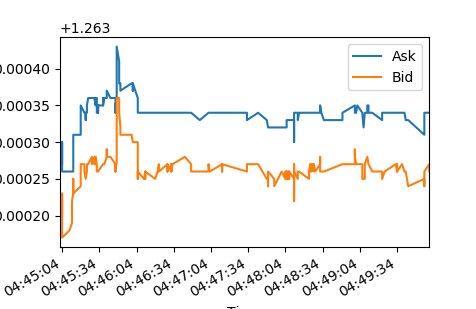

In [29]:
historicalSet.plot()

<IPython.core.display.Javascript object>


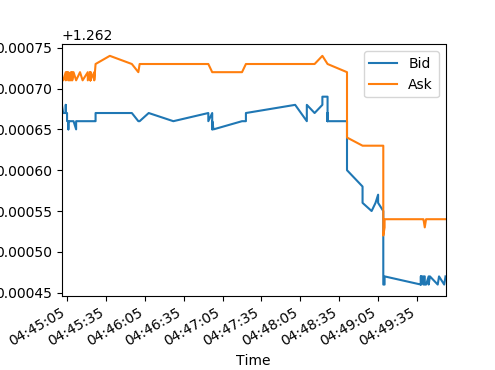

In [28]:
MT4Set['2019-05-30 04:45:00':'2019-05-30 04:50:00'].plot()